<h1><center> Assignment 1: EDA United Nations General Debate Corpus  </center></h1>



## Read UNGDC

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import matplotlib.pyplot as plt

sessions = np.arange(25, 76)
data=[]

for session in sessions:
    directory = "./TXT/Session "+str(session)+" - "+str(1945+session)
    for filename in os.listdir(directory):
        f = open(os.path.join(directory, filename))
        if filename[0]==".": #ignore hidden files
            continue
        splt = filename.split("_")
        data.append([session, 1945+session, splt[0], f.read()])

        
df_speech = pd.DataFrame(data, columns=['Session','Year','ISO-alpha3 Code','Speech'])
df_codes = pd.read_csv('UNSD — Methodology.csv', sep=';')

df_un_merged = df_speech.merge(df_codes[['Country or Area','ISO-alpha3 Code']], how='left', left_on='ISO-alpha3 Code', right_on='ISO-alpha3 Code')
df_un_merged.set_index(['Year','ISO-alpha3 Code'], inplace=True)
df_un_merged["Speech"] = df_un_merged["Speech"].str.lower()


## Run bag of words

In [2]:
count_vect = CountVectorizer(lowercase=True, \
                             stop_words='english',\
                             analyzer='word',\
                            token_pattern=r"[a-z]+'?[a-z]+", \
                            min_df=10, ngram_range=(1,1))
X_counts = count_vect.fit_transform(df_un_merged["Speech"])
X_counts_tf = TfidfTransformer(use_idf=True).fit_transform(X_counts)
words_list = count_vect.get_feature_names_out()
#X_counts = pd.DataFrame(X_counts.toarray(), columns=words_list)
X_counts = pd.DataFrame(X_counts_tf.toarray(), columns=words_list)


In [3]:
X_counts_tf.shape

(8481, 19361)

In [4]:
X_counts

,ababa,abandon,abandoned,abandoning,abandonment,abandons,abate,abated,abatement,abating,...,zimbabweans,zine,zionism,zionist,zionists,zonal,zone,zones,zuma,zurich
0,0.000000,0.037148,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.019275,0.000000,0.0,0.0
2,0.000000,0.012760,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.110391,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.0,0.028921,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8476,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
8477,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
8478,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.016045,0.0,0.0
8479,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [5]:
X_counts.sum()


ababa          10.668102
abandon        15.650344
abandoned       8.527856
abandoning      4.311010
abandonment     4.542406
                 ...    
zonal           1.041193
zone           45.346667
zones          26.042332
zuma            0.830193
zurich          0.457641
Length: 19361, dtype: float64

In [6]:
df_un_merged.reset_index()

,Year,ISO-alpha3 Code,Session,Speech,Country or Area
0,1970,LBR,25,"49.\t it gives me great pleasure, mr. presiden...",Liberia
1,1970,HND,25,153.\t this session of the general assembly w...,Honduras
2,1970,KHM,25,4.\t before i begin this speech i should like ...,Cambodia
3,1970,TUN,25,"83.\t mr. president, it is my pleasure to spe...",Tunisia
4,1970,BRA,25,"1.\tmr. president, i should like, first of all...",Brazil
...,...,...,...,...,...
8476,2020,CPV,75,"mr. president of the general assembly,\nexcell...",Cabo Verde
8477,2020,ARE,75,"mr. president,\nat the outset, i would like to...",United Arab Emirates
8478,2020,GEO,75,"mr. president,\nmr. secretary-general,\nesteem...",Georgia
8479,2020,CAN,75,"mr. president, fellow delegates, my friends.\n...",Canada


## Merge UNGDC with bag of words

In [7]:
df_un_merged = df_un_merged.reset_index().merge(X_counts, how='left', left_index=True, right_index=True)
df_un_merged.set_index(['Year','ISO-alpha3 Code'], inplace=True)


## Read happiness report and merge with country codes to get ISO-alpha3 Code

In [8]:
happinessdataframe = pd.read_excel('DataForTable2.1.xls')
df_happiness_merged = happinessdataframe.merge(df_codes[['Country or Area','ISO-alpha3 Code']], how='left', left_on='Country name', right_on='Country or Area')
df_happiness_merged.set_index(['year','ISO-alpha3 Code'], inplace=True)
df_happiness_merged.index.rename(['Year','ISO-alpha3 Code'], inplace=True)
df_happiness_merged.drop(columns=['Country name','Country or Area'], inplace=True)

## Merge UNGDC with happiness report by Multiple index Year, ISO

In [9]:
df_un_merged = df_un_merged.merge(df_happiness_merged, how='left', left_index=True, right_index=True)

## Build Regression for Life Ladder

### remove NaN rows from Life Ladder

In [10]:
# remove na from rows
x=df_un_merged.dropna(subset=['Life Ladder'])

### Split data set

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


y = x['Life Ladder'].values

# splitting the data
x_rem, x_test, y_rem, y_test = train_test_split(x, y, test_size=0.3, random_state = 42)
x_train, x_valid, y_train, y_valid = train_test_split(x_rem, y_rem, test_size=0.3, random_state = 42)






### Hyperparameters tunning based grid search on validation data set

In [78]:
# Create grid of parameters to test through cross-validation
param_grid = {'polynomialfeatures__degree': np.arange(1,3)}

pipe = make_pipeline( PolynomialFeatures(), LinearRegression())
grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(x_valid[words_list], y_valid);


/home/wolfson/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 15.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/home/wolfson/.local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/wolfson/.local/lib/python3.7/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/home/wolfson/.local/lib/python3.7/site-packages/sklearn/pipeline.py", line 355, in _fit
    **fit_params_steps[name],
  File "/home/wolfson/.local/li

### Fit the best estimator on train set

In [79]:
grid.best_estimator_.fit(x_train[words_list], y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

In [80]:
y_pred = grid.best_estimator_.predict(x_test[words_list])


# Compute test error and variance score
print("Model accuracy:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("")

Model accuracy:
Mean squared error: 0.32
Variance score: 0.72



In [99]:
 set(x_test.reset_index()['ISO-alpha3 Code'])

{'AFG',
 'AGO',
 'ALB',
 'ARE',
 'ARG',
 'ARM',
 'AUS',
 'AUT',
 'AZE',
 'BDI',
 'BEL',
 'BEN',
 'BFA',
 'BGD',
 'BGR',
 'BHR',
 'BIH',
 'BLR',
 'BRA',
 'BTN',
 'BWA',
 'CAN',
 'CHE',
 'CHL',
 'CHN',
 'CMR',
 'COL',
 'CRI',
 'CYP',
 'CZE',
 'DEU',
 'DNK',
 'DZA',
 'ECU',
 'EGY',
 'ESP',
 'EST',
 'ETH',
 'FIN',
 'FRA',
 'GAB',
 'GEO',
 'GHA',
 'GIN',
 'GRC',
 'GTM',
 'HND',
 'HRV',
 'HTI',
 'HUN',
 'IDN',
 'IND',
 'IRL',
 'IRQ',
 'ISL',
 'ISR',
 'ITA',
 'JAM',
 'JOR',
 'JPN',
 'KAZ',
 'KEN',
 'KGZ',
 'KHM',
 'KWT',
 'LBN',
 'LBR',
 'LBY',
 'LKA',
 'LSO',
 'LTU',
 'LUX',
 'LVA',
 'MAR',
 'MDG',
 'MEX',
 'MKD',
 'MLI',
 'MLT',
 'MMR',
 'MNE',
 'MNG',
 'MOZ',
 'MRT',
 'MUS',
 'MWI',
 'MYS',
 'NAM',
 'NER',
 'NGA',
 'NIC',
 'NLD',
 'NOR',
 'NPL',
 'NZL',
 'PAK',
 'PAN',
 'PER',
 'PHL',
 'POL',
 'PRT',
 'PRY',
 'QAT',
 'ROU',
 'RWA',
 'SDN',
 'SEN',
 'SGP',
 'SLE',
 'SLV',
 'SOM',
 'SRB',
 'SUR',
 'SVK',
 'SVN',
 'SWE',
 'SWZ',
 'TCD',
 'TGO',
 'THA',
 'TJK',
 'TKM',
 'TTO',
 'TUN',
 'UGA',


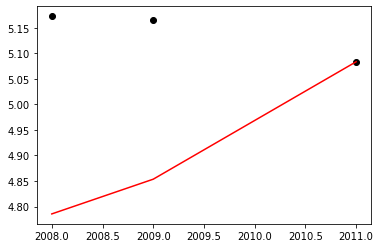

In [100]:
a = words_list.tolist()
a.append('Life Ladder')
data = x_test.loc[:,'UKR',:][a].reset_index()
y_pred_country = grid.best_estimator_.predict(data[words_list])

fig, ax = plt.subplots()
ax.scatter(data['Year'],data['Life Ladder'], c='black')
ax.plot(data['Year'],y_pred_country, c='red')

In [ ]:
# Create grid of parameters to test through cross-validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
param_grid = {'max_depth': [10,50, 100, 200, 300]}
grid_forest = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_forest.fit(x_valid, y_valid);

In [ ]:
y_pred = grid_forest.best_estimator_.predict(x_test)
grid_forest.best_estimator_
# Compute test error and variance score
print("Model accuracy:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("")
fig, ax = plt.subplots()
ax.scatter(np.arange(0,len(y_test)),y_test, c='black')
ax.scatter(np.arange(0,len(y_pred)),y_pred, c='red')
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# Compute test error and variance score
print("Model accuracy:")
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))
print("")
fig, ax = plt.subplots()
ax.scatter(np.arange(0,len(y_test)),y_test, c='black')
ax.scatter(np.arange(0,len(y_pred)),y_pred, c='red')
plt.show()